In [158]:
import numpy as np
import matplotlib.pyplot as plt

data_folder = "./2020.01.27/"
filename = "dupa_test_12"
a=300000
#fh = open(data_folder+filename, "rb")
fh =np.fromfile(data_folder+filename,dtype =np.uint8)
#ch = fh.read()
arr = np.unpackbits(fh)
arr2 = arr.reshape(4*a, 8)
arr3 = np.array(arr2.T)
print(arr3.shape)
arr4 = np.array(np.flipud(arr3))
arr5 = np.array(arr4.reshape(32, a))
print(arr4[:,:10])


arr2a = arr.reshape(4*a, 8)
arr4a = np.array(np.fliplr(arr2a))
print(arr4a[:10,:])
arr5a = np.array(arr4a.reshape(a, 32))
print(arr5a[:10,:])

print(arr5a[:,31].sum())
arr6a = np.array(np.fliplr(arr5a))
addr = np.array(np.fliplr(arr6a[:,1:6]))
timestamp = np.array(np.fliplr(arr6a[:,6:]))

val_addr = np.packbits(addr,axis=1,bitorder='little')
val_timestamp = np.packbits(timestamp,axis=1,bitorder='little')
val_timestamps = val_timestamp[:,0]+2**8*val_timestamp[:,1]+2**16*val_timestamp[:,2]+\
                2**24*val_timestamp[:,3]

(8, 1200000)
[[0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 1 0 0 1 0]
 [1 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 0 0 1 0 0 0 1 1]
 [1 0 0 1 0 1 0 1 1 1]]
[[0 0 0 1 1 1 1 1]
 [0 1 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0]
 [1 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 1 1 0 1 1]
 [0 1 1 0 0 0 1 1]]
[[0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 

31
31
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 30, 31], dtype=uint8), array([258954,   1808,   1518,   1374,   1313,   2452,   6225,   1756,
         1971,   1479,   1517,   1650,   1569,   1604,   1344,   1818,
         1661,   1455,   1344,   1530,   1868,   1850,   1830,    100,
           10], dtype=int64))


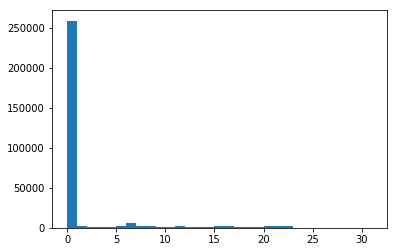

In [172]:
print(np.amax(val_addr))
print(val_addr.max())

plt.hist(val_addr,bins =31)
plt.plot()
print(np.unique(val_addr, return_counts=True))

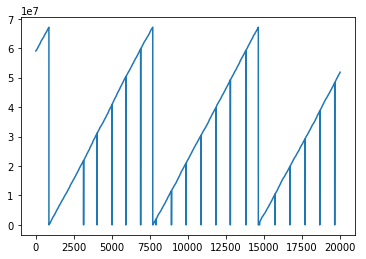

In [177]:
plt.plot(val_timestamps[20000:40000])

In [153]:
x_points = 10
y_points = 11
channels = 23
hist = np.zeros((x_points,y_points,channels)) 
lines = np.where(val_addr==31)[0]
lines =np.concatenate((lines,[300000]))
for i in range(lines.shape[0]-1):
    part = val_addr[lines[i]:lines[i+1]]
    pixels = np.concatenate(([0],np.where(part==30)[0],[lines[i+1]-lines[i]]))
    print(pixels)
    #for j in range(lines.shape[0]-1):
    

[    0   889  1871  2772  3749  4765  5776  6743  7720  8691  9643 10662]
[    0   894  1924  2889  3902  4855  5839  6832  7825  8812  9806 10761]
[    0   994  1990  2960  3942  4927  5931  6886  7866  8836  9763 10702]
[    0   908  1853  2891  3871  4829  5764  6774  7765  8833  9734 10698]
[    0  1009  2061  3090  4100  5084  6048  7053  8045  8978  9948 10914]
[    0   987  1992  3009  3973  4899  5895  6798  7720  8668  9605 10571]
[    0   960  1916  2875  3853  4792  5767  6725  7657  8632  9557 10553]
[    0   965  1952  2900  3882  4866  5825  6824  7777  8760  9738 10698]
[    0   963  1986  2969  3945  4949  5907  6878  7789  8829  9805 10838]
[     0    913   1885   2944   3923   4863   5813   6756   7805   8742
   9770 180463]


In [181]:
print(lines)
print(val_timestamps[44562:44568],val_timestamps[65960:65966])

[ 23140  33802  44563  55265  65963  76877  87448  98001 108699 119537
 300000]
[28390460    16384 28405148 28413355 28415404 28419491] [35566280 35566301 35567110    32768 35590785 35594669]
